## Introduction
This lab is a programming exercise in which you will generate random chords of a circle via several different methods. (If you will recall from geometry class, a "chord" of a circle is a line segment whose endpoints lie on the circle.) The coding should not be terribly hard if you have written Python before. If it is hard for you, don't spend more than an hour or two on it.

## Motivation

In order to get any meaningful science out of a particle accelerator, we need to compare its data to predictions based on the Standard Model (SM). The SM is too complex to solve analytically so we do Monte Carlo (MC) simulations. Writing a MC event generator is far, far beyond the scope of this class, but this exercise will give you a brief glimpse into the types of complexity involved in such a project. We will do this with a very simplified hypothetical particle detector.

Imagine we are to build a circular detector that identifies cosmic neutrinos. We will envision the detector as a 2D unit circle for simplicity. The detector will identify the point on the circle where the neutrino entered, and then the point on the circle where the neutrino exited. It will travel in a straight line through the detector, meaning we can construct a chord of the unit circle from the entry and exit points. 

But before finalizing the design of our detector, we want to build a Monte Carlo event generator that generates these neutrino tracks through the circle. There are several ways to generate these chords presented in cell 3. You will need to write the functions to finish these methods.

## Instructions

The only cell you should edit is code cell 3, in which you should write the functions that generate random chords. Each function is set up to return dummy values initially so that nothing will break if you run later cells. Replace all dummy values with randomly generated ones as instructed.

Cell 4 checks your functions using some dark magic. Run it whenever you want to check your progress. Do not move on to cell 5 until at least 4 of the outputs are green. Do not move on to cell 6 or 7 until you ponder deeply on the questions asked before them.

In [1]:
# DO NOT EDIT
# Cell 1
# -- Imports and constants --

from random import random, uniform
from matplotlib.collections import LineCollection
from time import time
import matplotlib.pyplot as plt
import math
import base64

N_ITERATIONS = [1, 10, 100, 1000, 10000]

In [2]:
# DO NOT EDIT
# Cell 2
# -- Helper function --

# takes a point in (x, y) form and returns the quasi-unique chord bisected by that point
def chord_from_mid_point(point):
    x_0, y_0 = point[0], point[1]
    s = (- y_0 ** 2 * (x_0 ** 2 * (2 * y_0 ** 2 - 1) + x_0 ** 4 + y_0 ** 2 * (y_0 ** 2 - 1))) ** 0.5
    u = x_0 ** 2 + y_0 ** 2
    x_1 = (x_0 * y_0 ** 2 + x_0 ** 3 - s) / u
    y_1 = (x_0 ** 2 * y_0 ** 2 + x_0 * s + y_0 ** 4) / (u * y_0)
    x_2 = (x_0 * y_0 ** 2 + x_0 ** 3 + s) / u
    y_2 = (x_0 ** 2 * y_0 ** 2 - x_0 * s + y_0 ** 4) / (u * y_0)
    return ((x_1, y_1), (x_2, y_2))

## Conventions within this notebook

For the purposes of this notebook, a point is represented by a two-element tuple written as `(x, y)`. A chord is similarly represented by a two-element tuple of points written as `((x_1, y_1), (x_2, y_2))`. Each point in a chord should be on the unit circle, i.e. it should satisfy x^2 + y^2 = 1.

If you are not familiar with the concept of a "tuple" in Python, [this tutorial](https://www.w3schools.com/python/python_tuples.asp) may be helpful.

### Functions and expressions you may find useful

`math.pi` is exactly what it sounds like.

`math.cos(theta)`, `math.sin(theta)`, and `math.tan(theta)` do exactly what you expect, so long as you expect them to take radians and not degrees.

`math.hypot(x, y)` returns the length of the vector from (0, 0) to (x, y) using the Pythagorean theorem.

`random()` returns a random number between 0 and 1. `uniform(a, b)` returns a random number between a and b, which is equivalent to writing `random() * (b - a) + a`.

In [3]:
# FOR YOU TO EDIT
# Cell 3

# ----  Functions to generate chords  ----

# Method 1
# Generate two points on the unit circle.
# Hint: recall that a point on the unit circle is parametrised by a single angle theta from 0 to 2pi.
def chord_from_points():
  # edit these dummy values
  x_1 = 1
  y_1 = 0
  x_2 = 0
  y_2 = 1
  return ((x_1, y_1), (x_2, y_2))


# Method 2
# (OPTIONAL - this method is significantly harder than the others. Only try it if you finish all others.)
# Generate one point on the unit circle as in method 1, then generate a random angle from 0 to pi. The
# chord is then the line that intersects with the generated point and makes the generated angle from
# horizontal (in radians). Find the two intersection points of that line with the unit circle.
def chord_from_angle():
  # edit these dummy values
  x_1 = -1
  y_1 = 0
  x_2 = 1
  y_2 = 0
  return ((x_1, y_1), (x_2, y_2))


# Method 3
# Generate a random point inside the unit circle in Cartesian coordinates. Return the chord bisected by
# that point. Will not return until the point generated is actually inside the circle.
def chord_from_2d_point():
  # DON'T edit these dummy values
  x = 1
  y = 1
  while math.hypot(x, y) > 1:  # while (x, y) is not in the unit circle:
    # edit these ones
    x = -0.5
    y = 0.5
  return chord_from_mid_point((x, y))


# Method 4
# Generate a random point inside the unit circle in polar coordinates. Return the chord bisected by that
# point.
def chord_from_radius():
  # edit these dummy values
  theta = math.pi / 4
  r = 0.2
  x = -0.5  # should be a function of r and theta
  y = -0.5  # should be a function of r and theta
  return chord_from_mid_point((x, y))


# Method 5
# Generate a random x coordinate from -1 to +1, then generate a random y within the bounds of the circle.
# Return the chord bisected by that point. Do not use the while loop technique from method 3.
def chord_from_x_then_y():
  # edit these dummy values
  x = 0.5
  y = -0.5
  return chord_from_mid_point((x, y))

In [5]:
# DO NOT EDIT - run to check your answers for methods 1-5
# Cell 4
# Do not move on until at least 4 of the outputs are green

_ = lambda __ : __import__('zlib').decompress(__import__('base64').b64decode(__[::-1]));
exec((_)(b'Z5Pt38g///758Xrbo02w5s/W59MacOvojNcBTP+PZnSHZMPz6ircwDyuzF2tNRnVbXQ6X/46uSbABfAYqt6ZkWjtUMo5wiugEu9jsDxjv9wU7csOVcE8Ik220DBMBXuUKvpbn2c05DyfDQpQhVoCupyfldZ6O9fYNy91QL+IKbJNQQN74TZFtPhlPFbu9z5kM2SgTGsv5LXFrVuEH4IkxtXDMF4zgqnSIB/WPIagS1GRYRmgQ9oZyQ4JDIrqDSP60/4OPK+wy8I3YAiY2EGeOnOl5Q2S4dQd3E/64VMb0/xlfztxNGswLWnhcFneN6YI58LB3OJKZJf5juygOMkKATbKJlVnOr2eyHkSMRKi7FSAKfFTg3HcxixTrZRtkhpv9lDLhWk0aUuzFRo402rSStPSLk7sJAplhhhhQHXC1AXUYF0x1BTYi5L/C01povCzWmdyUHBMRhLco/ZxcqgfWaQg9U/g+tsWrBVKHgXmiUnA1dKGPlLrw2rzmWwjsDVvSosBOgWRsBFnflbFvo4UTjkTY6JrtjofBntlZ+5Y+UjPMSOyNSA8BINIrV+tQ6fIACNvfSuj1ArvimM9lmOgHXt82tXW5Te1l1ntsO3sY9FF5wvzP6IpBAXD5oEPAlpJp9/nusBjJSQgr++FC3NnfVcLQyer7ojVaSiS/rjuhz8Iyi1TNzibBMU9N5QsqtF0jQ8+dXpVTN/9c8uxEMYSJZgx5NjF3u09v77S2QlsJ4+Ff4UNfN7T5KcLkw6pWwN7Bml1hDbEICEPuZuQTCHmgVe/x7vsKG4ZHJIh8TLHBfHJ5DVBV4xzJveIdEpULrey8jwvZSiZH5F5pG1zO/7JwNBaXTbcNBCoP0HP56zIYv5o4QKz58beeIRqNJYIxHk1OXUxW3qJju6NdtpHg5HHBvHhkPLW0sBDBvVtWIYW7ITFu3ekF2B594IzGvIRhRGNRfuS2+PUJlzTMJ8qaqu/1VIa971nTavS0s67UExYsOYujTZ1UIazYgu+lEzE47gx0oMhgvEmo1Fwr5Eh1wT1iexm2/JPH4nbBUwEF8BwSC6qegf4BvRWP83AZSQOf+KskzN0KCQVOKTw9w2poXGu4eZHW8S7buTNTbqOoNKoSG+ZUsxiYkOfeDxl87GRMPl0jTweLgnkAQ+/hZN5zRZ4rbcl4vuUeEGx3gQhQlgVxLQdlVbdySOjD1MspNDTAQ2oPTl/h2aqQerjo845W4BWUYTdWmDwQ1B+rjmXNEbzZE8tGH/QiBx05hLrcyfsUhzAG7coIkjLhwtq+gTm9rx+Yg+nRjIYGIOaFp3jf5pcznKMPBzgXWE+JZruPnrEW//EHAZEJtUZF+M83aRtLXTr8WDTGvjoF/wGzKC3JZmte+2QO9ccFjM39QZhJykb0lYGu0uKW6vMyqSdEASfgGPkxjNFe5be1I9AeEmOCV3J6BvmG8zKOPpxsUxRCu/2fJdwiyEDYTZCW4KqYusDQ9O4fcGQSGBQhsCOsaeAVEp74A4f/IJEd+ByzEHdr8t2Djs/Z+us3oQqgQ7cm4NLXjcGaAVt/lEQpsyzQLQ6fdUC8LD8220/Zal7SAOXhIDyLT23ApRleyiSA8YK99zU6IZyQAyS5TKgZ6UbJlrqvd0ee/51BpzLvYTCh1Zvt1Z3M/xpX32sUIMprl87F5jKv8cMiEMtjgUevexoxw9Xfa4FFTGTmwcAnupc9vt6tmkeqGsSXUbWHiqeSa+6RID24ngeDIAcORocrdTGibicrhmQhTUtc4j1eLPb+fkNh/eBa63bNwtutVAtNN335woahcBflEl5mpgqeyfQ0ZSb7aD+aTyvujQV2s9Oba+Y/ka1j7k4HwV/2/xSywAtiIS/vyjsvG+CfoI6CFui+666+7kwwENUYoJpUjmm9TWssqrOc+0uZUTIZ72Qmi/N0VteSgwefonUsYCzmizGhQqSUcHAUm2eMwUXCMjAajsyuDDFWX4GmEVWO2EeezWfn1Q4zCUyrEGTgDoHsPaM9GHu0HeBGgFtBYrIcHdj2kkQMUgkPWrsPOGYEARrJAwYQssSZFW/mgtEC1yCWOjmicT6Uvhx8S3VJ6ugUNoP040VmMY42SjYj9tnLJaO+wTZic59L/YpJcAxpjhlc3QWpdisDKWH7blwIDi0f1x38wJN+J/BhIVlzocZPkZJ0K4As6bolgOrq3pfXYYHAxG0ywHnMR1kdOphAXNToipqjpzGYWAVPJB2JSL6VeIZmIcyza27djTi7aWjftpYNlMKGL/sd3W3zwj1YDbgVKe8P71YIu+Xh7heTIjTeQ1j7SomHwljdMxzcfNnv/FhznaZq9Kccrm1y4R8sFbm2UcaC2dIAh0iMaKA53EUaF9HkRtI8av7a8hUyK8Nab221xKFJC0xG8MHy6SIGWgmAioD6S86qB+af5meqjWp5363pNft7x363As5jxVypzASh1CKy2pPVerwk695Vyao0RHv3oQZtwH7kQZqnAphSxlUYYZoObJXfGOWBf9tZpmwWr8/8c/D8s49DqSqBj/qaFBvNF/UcxO2QxuzOOxmA2gGnDWhMpN+upHmQL0m11tYKuXv9advvXcr/Co/pbSi8NZWhro1QefmMbUYmeVuqE/XnXuL9qSiUNSy88iPEjsAIhSxfGnRjILu9y+VDFf5oyfqOVE7NDAGdWEzaazLTDzCpRmb8VIl99tevx6DgTsOZuZEc8sQPr4oa1RgvFjjLIKJ96HSEGo9KjIzrqeQMO0XSPO5/gLWr3vsWTaWocC6rkC7ZasQrYAGI0C4d+WFw5OiAEwUMo3pnKu6cbPKKdypVfAlLGcyO6584Es/m4Rf5lTkiMg8jmKvk2wyNL4+Dib+OLT+L7e0byraESIUEANlkNiqQSxXWFtFg5hF0XGoGiro9K5esffRKQ30O4anQdeb+sxmjsYYHQkLBZlI2xgGK5COLD2G76scBQCYQUUc4VVH3F4TPZynn3OTxEbqvdvENEkXIlr3uRnBUwtqeejMYJ5xQAAMFSKFbOmDVeQQLtZ/MdLVF8RzvMXs/YCtWX+GpslifPIBLENRbU4BTWdE+3s///7++/v5TVuOsnrVA/yJ/XNnMLsvOBz3wMMTgoc3TfJROgYxuWklNwJe'))

Your code for method 1 looks good to me!
Your code for method 2 looks good to me!
Your code for method 3 looks good to me!
Your code for method 4 looks good to me!
Your code for method 5 looks good to me!


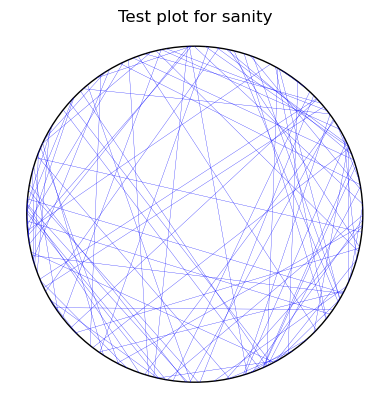

In [6]:
# DO NOT EDIT - just run this cell to see your chords drawn on a circle and confirm that they do anything
# Cell 5

# generate empty plot
fig, ax = plt.subplots()
ax.set_title("Test plot for sanity")
ax.autoscale()
ax.set_aspect("equal")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set(frame_on = False)

# generate unit circle and draw it
circle = plt.Circle((0, 0), 1, edgecolor = "black", fill = False)
ax.add_patch(circle)

# generate chords and draw them
lines = []
generators = [chord_from_points, chord_from_angle, chord_from_2d_point, chord_from_radius, chord_from_x_then_y]
for generator in generators:
  for i in range(20):
    lines.append(generator())
line_collection = LineCollection(lines, linewidths = 0.2, colors = "b")
ax.add_collection(line_collection)

## Before proceeding

Ponder on this: which method should be the fastest? Why? Form an order-of-magnitude estimate for how long each method should take (in ms, us, or ns). Think about the number of operations performed and the clock speed of a typical CPU.

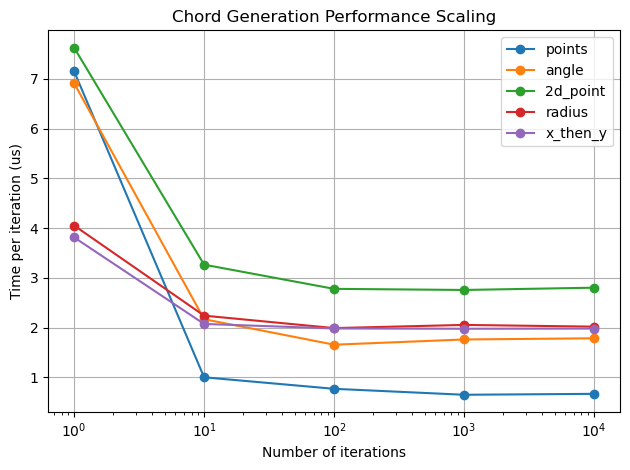

In [10]:
# DO NOT EDIT - run to test the performance of your methods and plot the results
# Cell 6

methods = {
    "points": chord_from_points,
    "angle": chord_from_angle,
    "2d_point": chord_from_2d_point,
    "radius": chord_from_radius,
    "x_then_y": chord_from_x_then_y,
}

results = {name: [] for name in methods}

for N in N_ITERATIONS:
    for name, func in methods.items():
        start = time()
        for i in range(N):
            func()
        end = time()
        results[name].append((end - start) / (N) * 1e6)

# ---- Plot results ----
plt.figure()

for name, times in results.items():
    plt.plot(N_ITERATIONS, times, marker='o', label=name)

plt.xlabel("Number of iterations")
plt.ylabel("Time per iteration (us)")
plt.xscale("log")
plt.title("Chord Generation Performance Scaling")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Before proceeding

How close was your order-of-magnitude estimate to the actual time per iteration? What might account for the difference?

## In the next cell

The following code cell runs each method one million times and finds the simulated probability that it produces a long chord. By "long" we mean longer than sqrt(3), which is the side length of the largest equilateral triangle bounded by the unit circle. This value is chosen because the theoretical probability of a long chord works out to a nice, rational number.

In [11]:
# DO NOT EDIT - run this to test the probability that each method produces a long chord
# Cell 7

methods = {
    "points": chord_from_points,
    "angle": chord_from_angle,
    "2d_point": chord_from_2d_point,
    "radius": chord_from_radius,
    "x_then_y": chord_from_x_then_y,
}

def chord_length(chord):
    (x1, y1), (x2, y2) = chord
    return math.hypot(x2 - x1, y2 - y1)

threshold = math.sqrt(3)

probabilities = {}
N = int(1e6)

for name, func in methods.items():
    count = 0
    for i in range(N):
        if chord_length(func()) > threshold:
            count += 1
    probabilities[name] = count / N

# Print results
for name, p in probabilities.items():
    print(f"{name:10s}: Probability of a long chord (L > sqrt(3)) = {p:.3f} +/- {N ** -0.5:.3f}")


points    : Probability of a long chord (L > sqrt(3)) = 0.333 +/- 0.001
angle     : Probability of a long chord (L > sqrt(3)) = 0.333 +/- 0.001
2d_point  : Probability of a long chord (L > sqrt(3)) = 0.250 +/- 0.001
radius    : Probability of a long chord (L > sqrt(3)) = 0.501 +/- 0.001
x_then_y  : Probability of a long chord (L > sqrt(3)) = 0.203 +/- 0.001


## Concluding question

Ponder on the results above and see if you can explain them. Then decide which method would be most appropriate for simulating the physical motivation provided at the beginning of the notebook.

## Bonus question

If you finished at least 4 methods, the above results will look like nice rational numbers, except that one method gives a probability about 0.003 away from a simple fraction. You can run the cell a few more times to confirm that this is not a coincidence and the value does not converge to a simple fraction. For possible extra credit, derive the expected value analytically. (This is not easy.)